# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 1</center></h1>
### <h1><center>Important NOTE: In order to get full credit, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof.</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Cole Nockolds</center></h1>
#### <h1><center>Due day: 11:00 pm, Monday, 16, September, 2024 </center></h1>
### If you use this jupyter notebook for the assignment, please convert to .pdf file for submission. For other options, all submission MUST be in pdf format, except codes.

--- 

Suppose we would like to solve the following nonlinear optimization problem

\begin{equation}
\min_{\boldsymbol{\theta}} J(\boldsymbol{\theta})
\end{equation}

We shall explore the gradient descent algorithm (the workhorse of machine learning) to find an approximate local minimum. See the supplementary document (**Modules -> Optimization_Probability.pdf -> section-1.3**) for further details on general idea, derivation, practical aspect of gradient descent algorithm. Below is a pseudo code.

### **Algorithm: Gradient descent**

**Inputs:** Tolerance $\tau$, initial guess $\boldsymbol{\theta}^i$, $i=0$

*while* $||\nabla_{\boldsymbol{\theta}}(\boldsymbol{\theta}^i)|| \geq \tau$ do
    
\begin{align*}
    & \boldsymbol{\theta}^{i} := \boldsymbol{\theta}^{i-1} - \alpha \cdot \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta}^{i-1}). \\
    & i = i + 1
\end{align*}

*end*

$\boldsymbol{\theta}^* = \boldsymbol{\theta}^i$


**Output:** The approximate minimizer $\boldsymbol{\theta}^*$

---

## **Question 1** (Linear regression for 2 linear features)

Load the UCI Diabetes Dataset and identify the *BMI* and *BP* features, denoted as $x_1, x_2$, respectively. The diabetes risk score is the target variable and is denoted as $y$. We assume the model for linear regression has the following form

$$ \bar{y} = 0.4638 + \theta_1 x_1 + \theta_2 x_2.$$

The mean square error loss function is given by

$$J(\boldsymbol{\theta})=\frac{1}{2n}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where $n$ is the number of patients, $y^{(i)}$ is the data for the $i$ th patient, and $\bar{y}^{(i)} = 0.4638 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)}$ with $x_1^{(i)}$ and $x_2^{(i)}$ being the BMI and BP features of the $i$ th patient.

- (1.a) (+25 pt) Using the gradient descent algorithm, find the optimal $\theta_1$ and $\theta_2$. You need to use the pseudo code below as the skeleton/blueprint for your codes.

- (1.b) (+5 pt) Plot the contours of the loss function over the square domain $[0,4]^2$

- (1.c) (+10 pt) Plot the history the gradient descent vector on the contour map from the two initial guesses $(\theta_1, \theta_2) = (4,4)$ and $(\theta_1, \theta_2) = (0,0)$. You can plot a vector for every 100 iterations.


## **1a Answer** (finding optimal coefficients)

In [238]:
# Code to determine optimal theta values

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(theta, X):
    return 0.4638 + theta[0] * X.iloc[:, 0] + theta[1] * X.iloc[:, 1]

def mean_squared_error(theta, X, y):
    y_pred = f(theta, X)
    return 1 / (2 * len(y)) * np.sum((y - y_pred) ** 2) 

def mse_gradient(theta, X, y):
    return np.mean((f(theta, X) - y) * X.T, axis=1).values # vs np.sum

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
# Collect 20 data points and use bmi and bp dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

tolerance = 1e-6
step_size = 4e-1
theta_prev = np.array([1,1])

def grad_descent(theta, theta_prev = theta_prev):
    J_grad = mse_gradient(theta, X_train, y)
    thetas = theta
    iter = 0
    while np.linalg.norm(theta - theta_prev) > tolerance:
        J_grad = np.vstack((J_grad,mse_gradient(theta, X_train, y_train)))
        thetas = np.vstack((thetas, theta))
        theta_prev = theta
        gradient = mse_gradient(theta, X_train, y_train)
        theta = theta_prev - step_size * gradient
        iter += 1
    return theta,thetas, J_grad

theta_opt_0,thetas_0, J_grads_0 = grad_descent(np.array([0,0]))
theta_opt_4,thetas_4, J_grads_4 = grad_descent(np.array([4,4]))

theta0_grid = np.linspace(0,4,101)
theta1_grid = np.linspace(0,4,101)
print("Optimal Theta from (0,0):", theta_opt_0)
print("Optimal Theta from (4,4):", theta_opt_4)

Optimal Theta from (0,0): [3.61061921 0.23010028]
Optimal Theta from (4,4): [3.61061894 0.23010056]


---

## **1a Comments** 

The optimal $\boldsymbol {\theta} ^*$ is: 
$$
\boldsymbol {\theta}^* \approx \begin{bmatrix} 
3.61061921 \\ 
0.23010028 
\end{bmatrix}
$$
or $\theta_0 \approx 3.61061921$ and $\theta_1 \approx 0.23010028$.



 


## **1b Answer** (plotting contours)

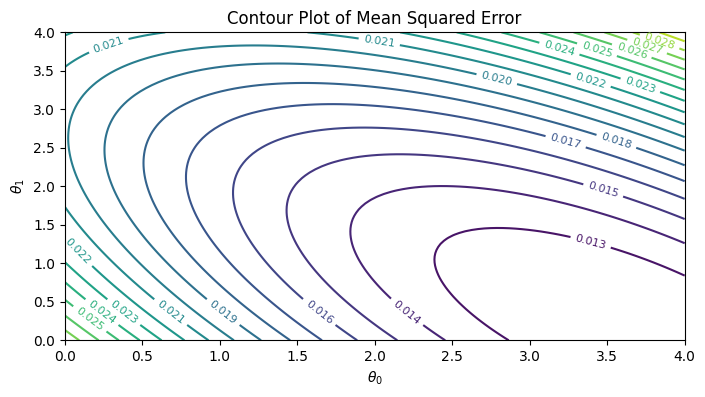

In [239]:
plt.clf()
# Create a grid for theta0 and theta1
theta0_range = np.linspace(0, 4, 100)
theta1_range = np.linspace(0, 4, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)

# Compute MSE for each combination of theta0 and theta1
J_grid = np.zeros(theta0_grid.shape)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta = np.array([theta0_grid[i, j], theta1_grid[i, j]])
        J_grid[i, j] = mean_squared_error(theta, X_train, y_train)

contour = plt.contour(theta0_grid, theta1_grid, J_grid, 20, cmap='viridis')

plt.clabel(contour, inline=True, fontsize=8)

# Labeling
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour Plot of Mean Squared Error')

# Save and show the plot
plt.savefig('1b_contour_plot.png')
plt.show()

## **1b Comments** 

The above is a contour plot that shows $\displaystyle J(\boldsymbol{\theta})$, where $\displaystyle J$ is the mean squared error. The two axes represent different $\theta_0$ and $\theta_1$ values, for which $\displaystyle J(\boldsymbol{\theta})$ is calculated and plotted in the colored lines.


## **1c Answer (plotting gradient descent vector)** 





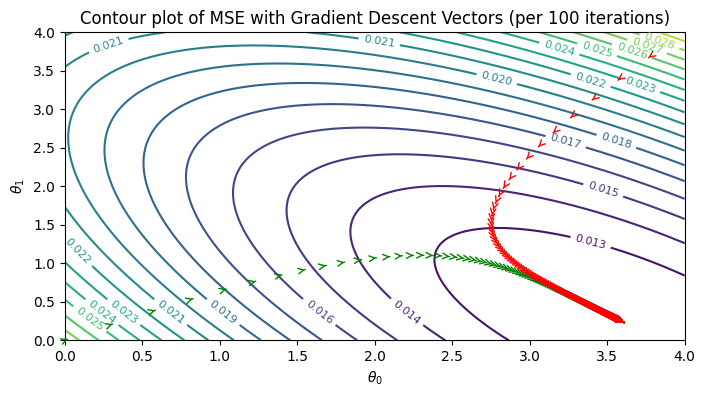

In [249]:
line_length = .02
def plot(thetas, J_grad,c):
    for theta0_pt, theta1_pt, df0 in zip(thetas[:,0],thetas[:,1], J_grad):
        plt.annotate('', xytext=(theta0_pt, theta1_pt),
                    xy=(theta0_pt-line_length*df0[0],
                        theta1_pt-line_length*df0[1]),
                    arrowprops={'arrowstyle': '->', 'lw': 1, 'color':c}, va='center', ha='center')
plot(thetas_0[::100], J_grads_0[::100], 'g')
plot(thetas_4[::100], J_grads_4[::100], 'r')
contour = plt.contour(theta0_grid, theta1_grid, J_grid, 20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.xlim(0,4)
plt.ylim(0,4)

# Display the plot
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour plot of MSE with Gradient Descent Vectors (per 100 iterations)')
plt.savefig('1c.png')
plt.show()


## **1c Comments** 

The above is a contour plot that shows $\displaystyle J(\boldsymbol{\theta})$, where $\displaystyle J$ is the mean squared error. The two axes represent different $\theta_0$ and $\theta_1$ values, for which $\displaystyle J(\boldsymbol{\theta})$ is calculated and plotted in the colored lines. The green arrows represent the gradient descent optimization path for an initial starting point of:
$$
\boldsymbol {\theta}^0 = \begin{bmatrix} 0.0 \\ 
0.0
\end{bmatrix}
$$
Meanwhile, the red arrows represent the gradient descent optimization path for an initial starting point of:
$$
\boldsymbol {\theta}^0 = \begin{bmatrix} 4.0 \\ 
4.0
\end{bmatrix}
$$
The 100th iteration of the gradient descent vector is plotted. 

---

## **Question 2** (Linear regression for 2 nonlinear features, Multivariate Polynomial Regression)

For this question, we still consider the pairs of *BMI* and *BP* features ($x_1, x_2$) as in Question 1. However, the linear model now is changed to

$$ \bar{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2$$

The mean square error loss function is still the same

$$J(\boldsymbol{\theta})=\frac{1}{2n}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$

where, again, $n$ is the number of patients. ($x_1^{(i)}, x_2^{(i)}, y^{(i)}$) are the same as in Question 1.

- (+30 pt) Using the gradient descent algorithm, find the optimal $ \boldsymbol{\theta}^* = \{\theta_i\}_{i = 0}^5$. You need to use the pseudo code below as the skeleton/blueprint for your codes


## **2 Answer (finding optimal coefficients)**
Note: program takes around 4 minutes to run. 





In [284]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(theta, X):
    return (theta[0] 
            + theta[1] * X.iloc[:, 0] 
            + theta[2] * X.iloc[:, 1] 
            + theta[3] * X.iloc[:, 0] * X.iloc[:, 1] 
            + theta[4] * X.iloc[:, 0]**2 
            + theta[5] * X.iloc[:, 1]**2)

def mean_squared_error(theta, X, y):
    y_pred = f(theta, X)
    return 1 / (2 * len(y)) * np.sum((y - y_pred) ** 2) 

def mse_gradient(theta, X, y):
    y_pred = f(theta, X)
    error = y_pred - y
 
    gradients = np.zeros(theta.shape)

    gradients[0] = np.mean(error)
    gradients[1] = np.mean(error * X.iloc[:, 0])
    gradients[2] = np.mean(error * X.iloc[:, 1])
    gradients[3] = np.mean(error * X.iloc[:, 0] * X.iloc[:, 1])
    gradients[4] = np.mean(error * X.iloc[:, 0]**2)
    gradients[5] = np.mean(error * X.iloc[:, 1]**2)

    return gradients

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
# Collect 20 data points and use bmi and bp dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

tolerance = 1e-6
step_size = 4e-1 
theta, theta_prev = np.array([0,0,0,0,0,0]), np.array([1,1,1,1,1,1])
iter = 0

while np.linalg.norm(theta - theta_prev) > tolerance:
    if iter > 200000:
        break
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    iter += 1
print("Optimal Theta:", theta)
print("Iteration:", iter)
print(f"Final Mean Squared Error: {mean_squared_error(theta, X_train, y_train):.4f}")
print(f"Residual: {np.linalg.norm(theta - theta_prev):.4f}")

Optimal Theta: [ 0.40321129  3.27370785  0.50343709  8.68341456  8.08531226 10.40964703]
Iteration: 200001
Final Mean Squared Error: 0.0087
Residual: 0.0000


## **2 Comments** 

The optimal $\boldsymbol {\theta} ^*$ is: 
$$
\boldsymbol {\theta}^* \approx \begin{bmatrix} 
0.40321129 \\ 
3.27370785 \\
0.50343709 \\
8.68341456 \\
8.08531226 \\
10.40964703
\end{bmatrix}
$$

The tolerance of $\|\theta^{i} - \theta^{i-1}\|_{2} < 10^{-6}$ is never met; a minimial tolerance of $\ \approx 4.510 * 10^{-05}$ is achieved after the max 200,000 iterations, where the final mean squared error is $\ \approx 8.673 * 10^{-3} $.


---

## **Question 3** (Linear regression for 2 nonlinear features)

Instead of using gradient descent, use the ordinary least squares approach to 

- (3.a) (+10 pt) derive the gradient of the loss function with respect to $\boldsymbol{\theta}$ $$ \nabla_{\boldsymbol{\theta}} J(\boldsymbol{\theta})$$

- (3.b) (+10 pt) derive the optimal solution $$\boldsymbol{\theta}^* = (\theta_i)_{i = 0}^5$$


(3.c) (+10 pt) Let $X$ be the feature matrix, determine under which conditions the following matrix

$$ X^T X $$

is invertible, or $$ \boldsymbol{\theta}^T (X^T X) \boldsymbol{\theta} > 0.$$



---

## **Question 4** (Bounus +10): 
1. Are solutions, $\boldsymbol{\theta}^*$, from Question 2 and Question 3 exactly the same? If not, which solution is the accurate one? Explain the reason for your answer.
2. If the $\boldsymbol{\theta}^*$ are different, can you propose a way to improve the accuracy of inaccurate solution?